# Heart Disease Prediction: Logistic Regression Model

### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report

In [5]:
data=pd.read_csv('data/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Data preprocessing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [14]:
data.shape

(4238, 16)

In [16]:
data.size

67808

In [18]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
# Handle missing values column by column
data['education'] = data['education'].fillna(data['education'].mean())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mean())
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].mean())
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())

# Verify missing values are resolved
print(data.isnull().sum())


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Correlation Analysis

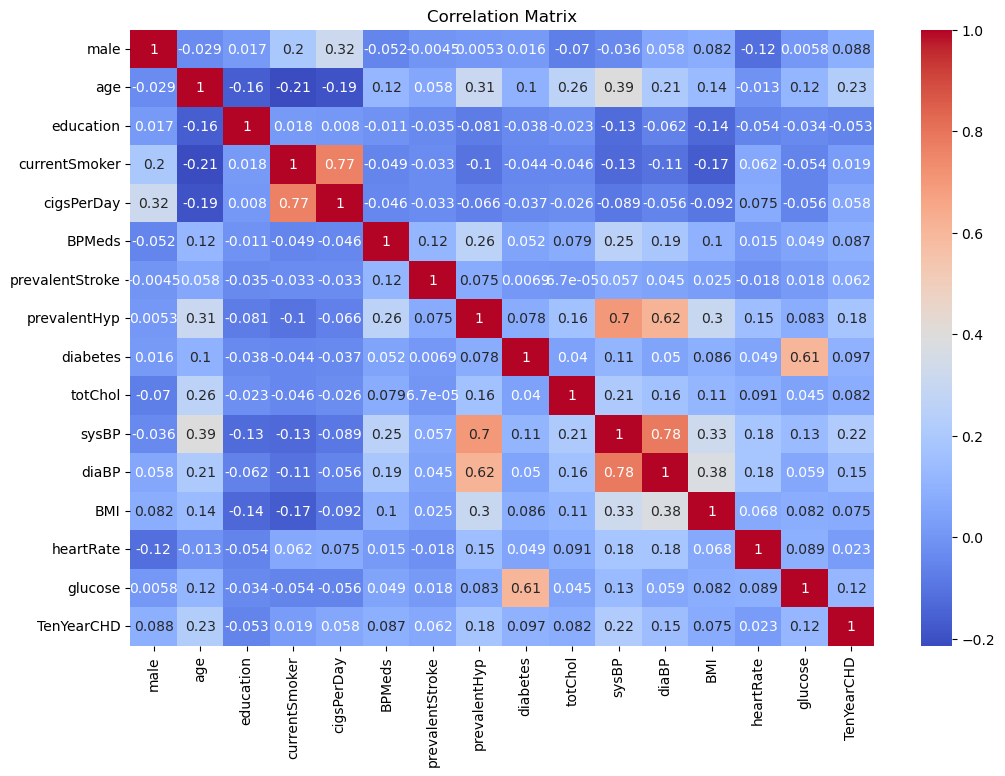

In [23]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Visualization

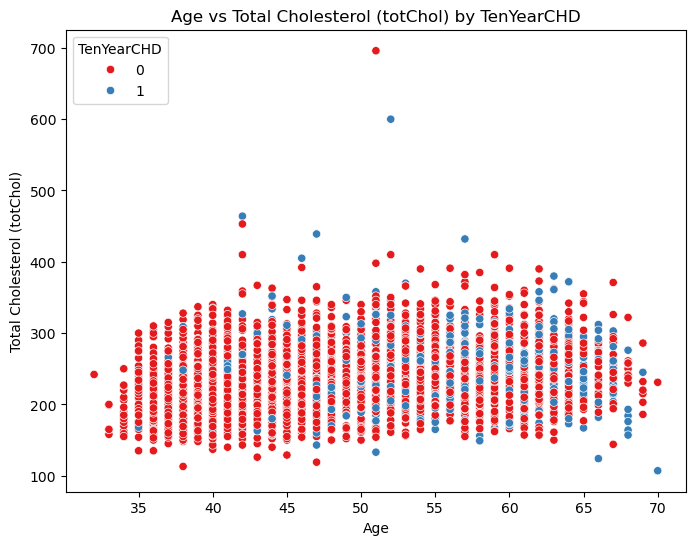

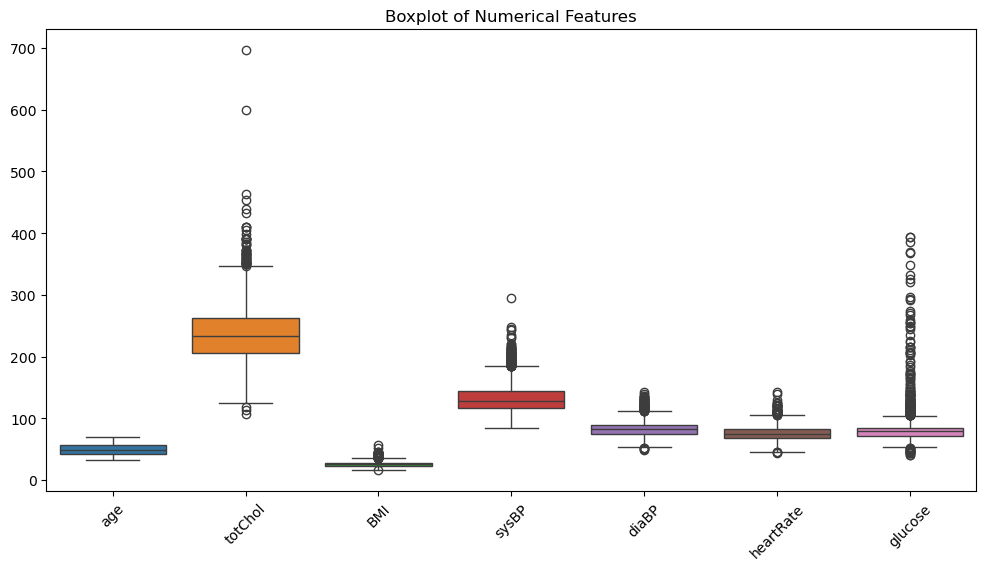

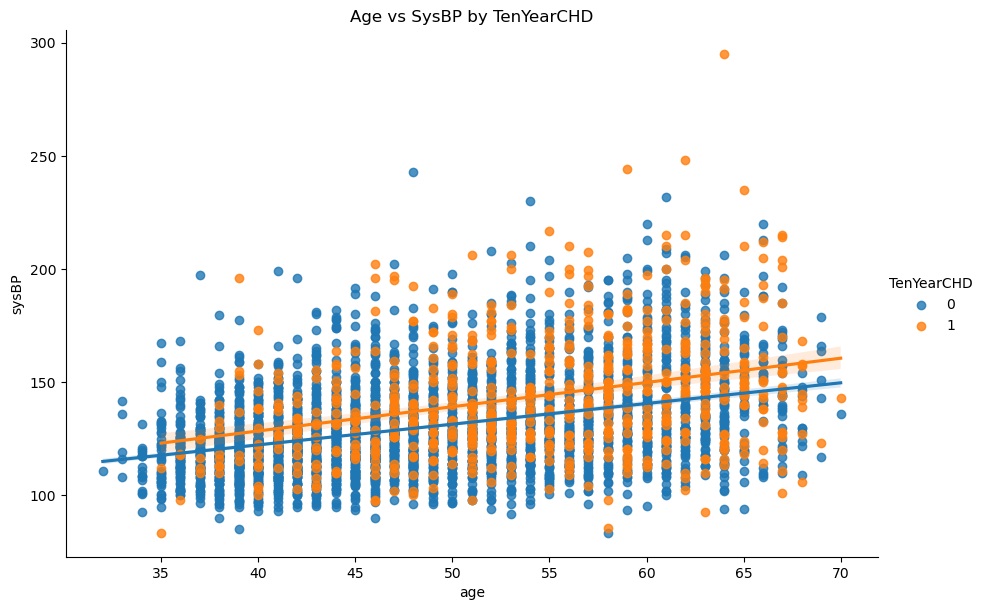

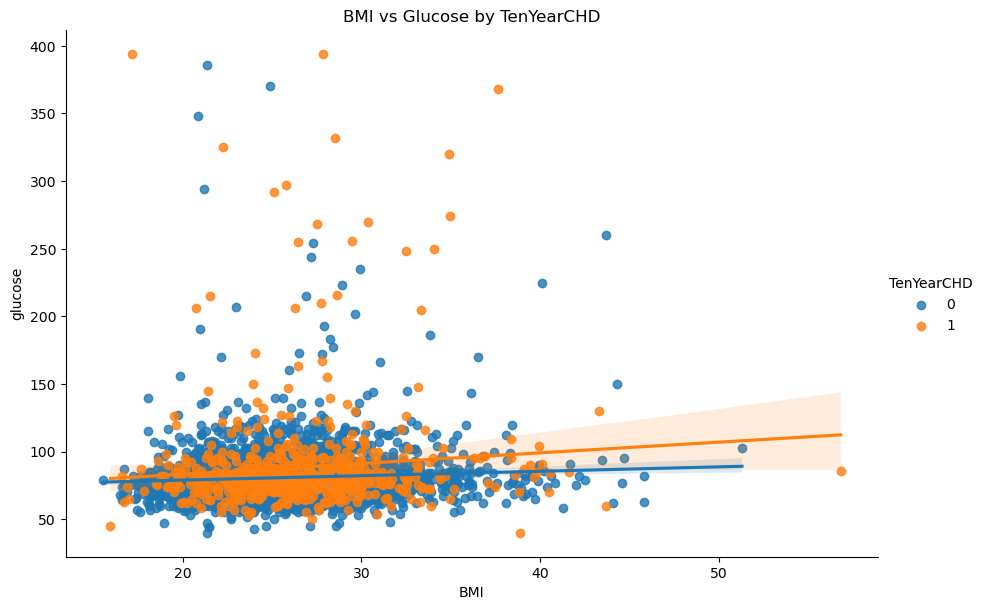

In [84]:
# Scatter plot for Age vs. Total Cholesterol (totChol)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="age", y="totChol", hue="TenYearCHD", palette="Set1")
plt.title("Age vs Total Cholesterol (totChol) by TenYearCHD")
plt.xlabel("Age")
plt.ylabel("Total Cholesterol (totChol)")
plt.legend(title="TenYearCHD", loc="upper left")
plt.show()

# Boxplot to visualize distributions and detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["age", "totChol", "BMI", "sysBP", "diaBP", "heartRate", "glucose"]])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Lmplot to visualize relationships
sns.lmplot(data=data, x="age", y="sysBP", hue="TenYearCHD", height=6, aspect=1.5)
plt.title("Age vs SysBP by TenYearCHD")
plt.show()

sns.lmplot(data=data, x="BMI", y="glucose", hue="TenYearCHD", height=6, aspect=1.5)
plt.title("BMI vs Glucose by TenYearCHD")
plt.show()


### Label Encoding

In [38]:
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'].astype(str))

### Splitting Data into Inputs (X) and Target (Y)

In [42]:
X = data.drop(columns=["TenYearCHD"])
y = data["TenYearCHD"]

### Scaling Inputs

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Data into Train and Test Sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Logistic Regression Modeling

In [50]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [52]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

### Visualization of Actual & Predicted Values

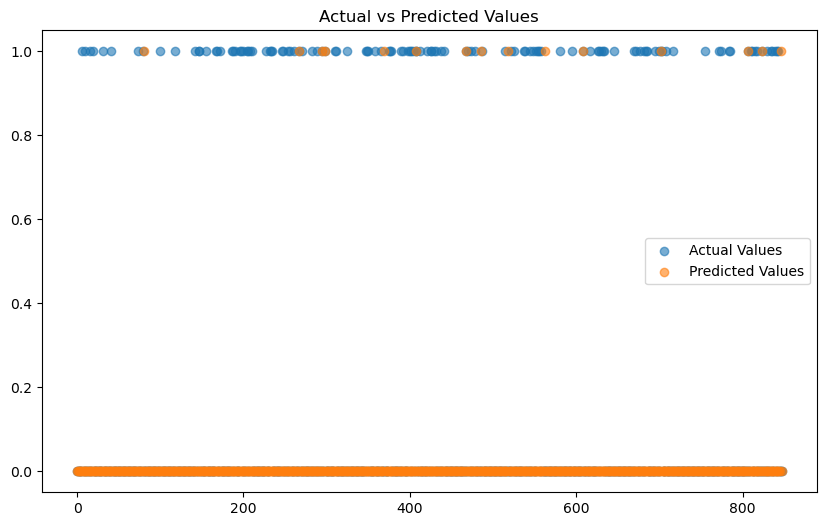

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Values", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

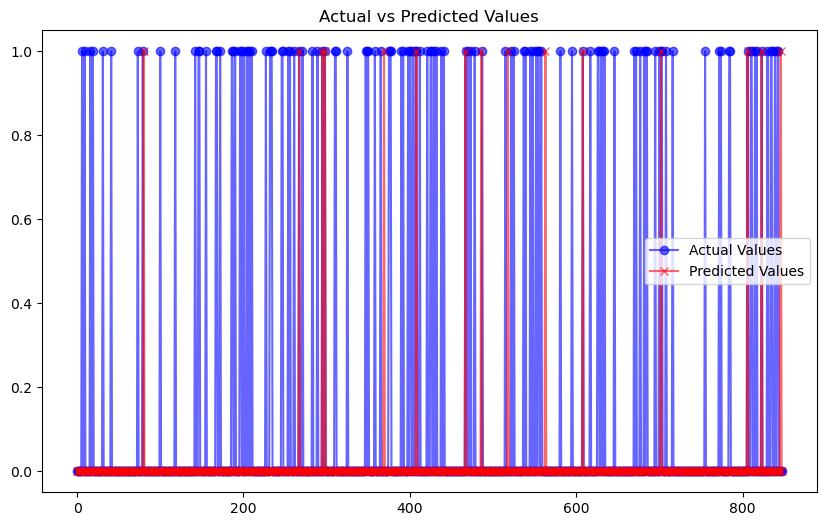

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="Actual Values", alpha=0.6, color='blue', linestyle='-', marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Values", alpha=0.6, color='red', linestyle='-', marker='x')
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

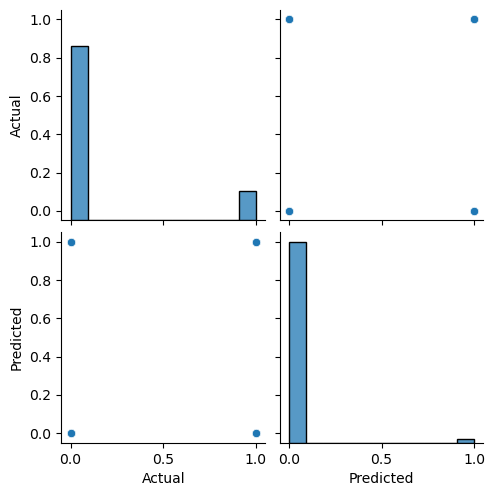

In [100]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.pairplot(results)
plt.show()

### Creating DataFrame to View Results

In [60]:
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results_df.head())

      Actual  Predicted
3188       0          0
764        0          0
3264       0          0
1967       0          0
2185       0          0


### Model evaluation

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[718   6]
 [115   9]]


In [65]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")

Accuracy: 85.73113207547169 %


In [69]:
# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [71]:
#END